In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


N = 10
theta_0 = 0.5
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

4

In [2]:
x

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [3]:
stats.binom_test(6, N)

0.75390625000000022

In [4]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [5]:
sp.stats.binom_test(n, N)

0.92041076261282062

In [6]:
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [7]:
sp.stats.binom_test(n, N)

0.00018314322488235352

In [8]:
N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [9]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

In [10]:
N = 100
K = 4
theta_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [11]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.559999999999999, pvalue=0.00087034719789121269)

In [12]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [13]:
len(x)

10

In [14]:
def ztest_1samp(x, sigma2=1, mu=0):
    print (x.mean() - mu)
    print np.sqrt(sigma2/float(len(x)))
    z = (x.mean() - mu)/ np.sqrt(sigma2/float(len(x)))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [15]:
ztest_1samp(x)

0.738023170729
0.316227766017


(2.3338341854824276, 0.019604406021683538)

type1 error : 귀무가설이 진실임에도 불구하고 거짓으로 나온 경우 the reason why - n is small

In [16]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [17]:
ztest_1samp(x)

0.0598080155345
0.1


(0.59808015534484993, 0.54978645086241684)

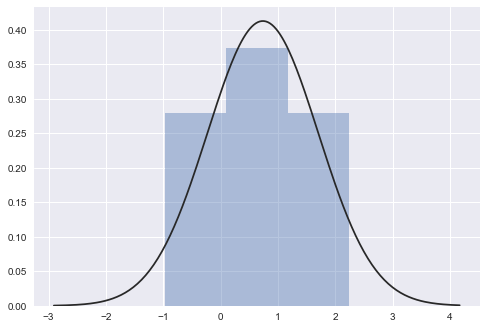

In [18]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [19]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

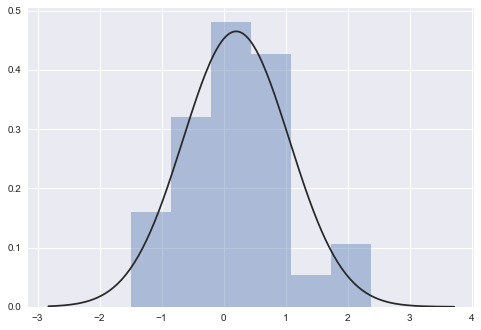

In [29]:
N = 29
mu_0 = 0
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [30]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=1.2442248104047384, pvalue=0.2237320653667787)

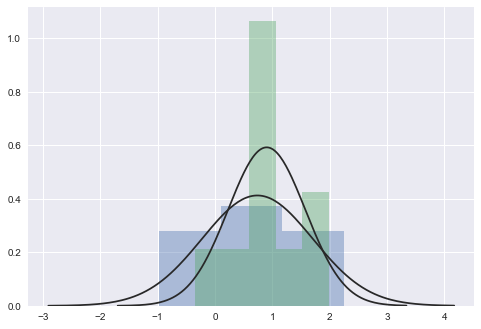

In [34]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [36]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

Type 2 Error: 귀무 가설이 거짓임에도 불구하고 진실로 나온 경우

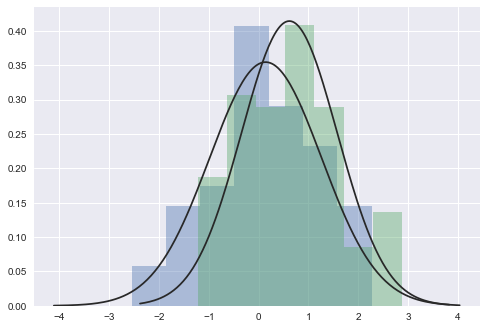

In [37]:
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [38]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.0081339709157226582)

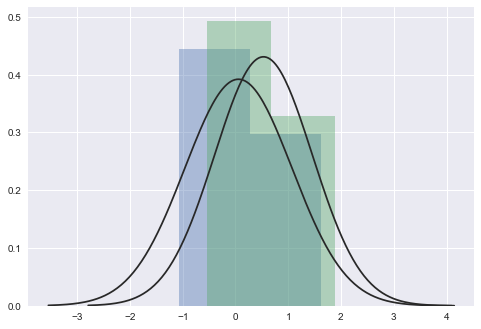

In [39]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [40]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

In [42]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

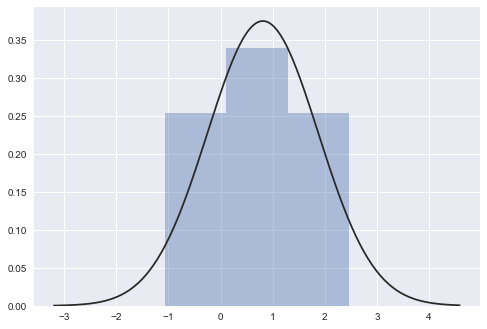

1.0637871321863899

In [43]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [44]:
chi2var_test(x)

(11.316430626053437, 0.25464123584764531)

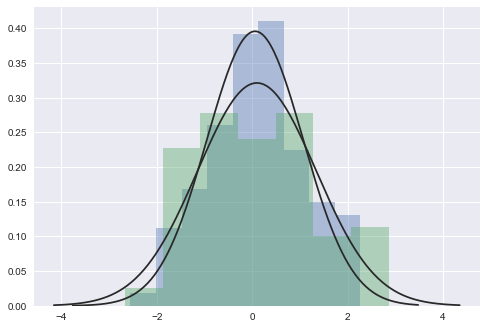

(1.0078822447165796, 1.2416003969261071)

In [45]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [46]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)

In [47]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)

In [48]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)

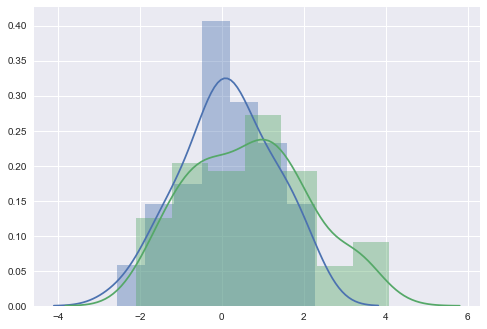

In [49]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [50]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)